<a href="https://colab.research.google.com/github/aditya-ailsinghani/Telecom-Customer-Churn-Prediction---Retention-Strategy/blob/main/CustomerChurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install xgboost

Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb


Load Dataset

In [ ]:
file_path = '/content/drive/MyDrive/Projects/CustomerChurn/TelecomCustomers.csv'
df = pd.read_csv(file_path)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Data Preprocessing


In [ ]:
# View dataset info: data types, nulls, non-nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


*The trap here is TotalCharges is type Object so to see if it has any null values or not we need to convert it to Floating type*

In [ ]:
# Convert TotalCharges to numeric, turn errors (like empty strings) into NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check how many rows have NaN after conversion
print("Missing TotalCharges:", df['TotalCharges'].isna().sum())

# Show those rows (optional)
df[df['TotalCharges'].isna()]

Missing TotalCharges: 11


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [ ]:
#Since only 11/7043 rows have Na in Total charges we can just remove these rows
# Drop rows with missing TotalCharges
df.dropna(subset=['TotalCharges'], inplace=True)

#resetting indexes
df.reset_index(drop=True, inplace=True)

# Check shape to confirm
print("Updated shape:", df.shape)

Updated shape: (7032, 21)


In [ ]:
# Quick overview of Churn distribution (our target variable)
df['Churn'].value_counts()

,count
Churn,
No,5163
Yes,1869


Encoding Categorical Variables

In [ ]:
# Step 1: Normalize 'No internet service' and similar values
normalize_cols = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines'
]

for col in normalize_cols:
    df[col] = df[col].replace({'No internet service': 'No', 'No phone service': 'No'})

# Step 2: Binary columns to map Yes/No → 1/0
binary_cols = [
    'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

# Step 3: Encode gender
df['gender'] = df['gender'].map({'Female': 1, 'Male': 0})

# Step 4: One-hot encoding for multi-class categorical columns
multi_class_cols = ['InternetService', 'Contract', 'PaymentMethod', 'MultipleLines']

df = pd.get_dummies(df, columns=multi_class_cols, drop_first=True)


# Step 5: Incode Target variable
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
# Optional: Confirm everything is now numeric
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7032 non-null   object 
 1   gender                                 7032 non-null   int64  
 2   SeniorCitizen                          7032 non-null   int64  
 3   Partner                                7032 non-null   int64  
 4   Dependents                             7032 non-null   int64  
 5   tenure                                 7032 non-null   int64  
 6   PhoneService                           7032 non-null   int64  
 7   OnlineSecurity                         7032 non-null   int64  
 8   OnlineBackup                           7032 non-null   int64  
 9   DeviceProtection                       7032 non-null   int64  
 10  TechSupport                            7032 non-null   int64  
 11  Stre

In [ ]:
#Also since ID is just a identifier and not required for prediction, we drop it
df.drop('customerID', axis=1, inplace=True)

Split Data

In [ ]:
# Separate features (X) and target (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

In [ ]:
# Split into training and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
# Check shape of split
print("Train set:", X_train.shape)
print("Test set :", X_test.shape)

Train set: (5625, 23)
Test set : (1407, 23)


Logistic Regression

In [ ]:
# 1. Initialize model
logreg = LogisticRegression(max_iter=2000)

# 2. Fit model on training data
logreg.fit(X_train, y_train)

# 3. Predict on test data
y_pred = logreg.predict(X_test)
y_proba = logreg.predict_proba(X_test)[:, 1]  # Probabilities for ROC AUC

# 4. Evaluate model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_proba))

Confusion Matrix:
 [[916 117]
 [158 216]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.58      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407


ROC-AUC Score: 0.8365088444952917


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


XG Boost

In [ ]:
# 1. Initialize model
xgb_clf = xgb.XGBClassifier(
    use_label_encoder=False,  # avoid warning
    eval_metric='logloss',   # necessary with older XGBoost versions
    random_state=42
)

# 2. Fit model
xgb_clf.fit(X_train, y_train)

# 3. Predict
y_pred_xgb = xgb_clf.predict(X_test)
y_proba_xgb = xgb_clf.predict_proba(X_test)[:, 1]

# 4. Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_proba_xgb))

Confusion Matrix:
 [[890 143]
 [169 205]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85      1033
           1       0.59      0.55      0.57       374

    accuracy                           0.78      1407
   macro avg       0.71      0.70      0.71      1407
weighted avg       0.77      0.78      0.78      1407


ROC-AUC Score: 0.8196494297798325


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:41:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Weighted XGBoost

In [ ]:
xgb_weighted = xgb.XGBClassifier(
    eval_metric='logloss',
    scale_pos_weight=2.76,
    random_state=42
)

xgb_weighted.fit(X_train, y_train)

y_pred_weighted = xgb_weighted.predict(X_test)
y_proba_weighted = xgb_weighted.predict_proba(X_test)[:, 1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_weighted))
print("\nClassification Report:\n", classification_report(y_test, y_pred_weighted))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_proba_weighted))

Confusion Matrix:
 [[803 230]
 [118 256]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.78      0.82      1033
           1       0.53      0.68      0.60       374

    accuracy                           0.75      1407
   macro avg       0.70      0.73      0.71      1407
weighted avg       0.78      0.75      0.76      1407


ROC-AUC Score: 0.8146577384804136


Random Forest

In [ ]:

# 1. Initialize model
rf_clf = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',  # handle imbalance
    random_state=42
)

# 2. Fit model
rf_clf.fit(X_train, y_train)

# 3. Predict
y_pred_rf = rf_clf.predict(X_test)
y_proba_rf = rf_clf.predict_proba(X_test)[:, 1]

# 4. Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_proba_rf))

Confusion Matrix:
 [[925 108]
 [187 187]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.63      0.50      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407


ROC-AUC Score: 0.8200985137520643


In [ ]:
!pip install lightgbm

LightGBM


In [ ]:
# 1. Initialize model
lgb_clf = lgb.LGBMClassifier(
    class_weight='balanced',  # to handle imbalance
    random_state=42
)

# 2. Fit model
lgb_clf.fit(X_train, y_train)

# 3. Predict
y_pred_lgb = lgb_clf.predict(X_test)
y_proba_lgb = lgb_clf.predict_proba(X_test)[:, 1]

# 4. Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lgb))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_proba_lgb))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1495, number of negative: 4130
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001771 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 623
[LightGBM] [Info] Number of data points in the train set: 5625, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
Confusion Matrix:
 [[770 263]
 [ 88 286]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.75      0.81      1033
           1       0.52      0.76      0.62       374

    accuracy                           0.75      1407
   macro avg       0.71      0.76      0.72      1407
weighted avg       0.80      

LIGHTGBM Feature Importance


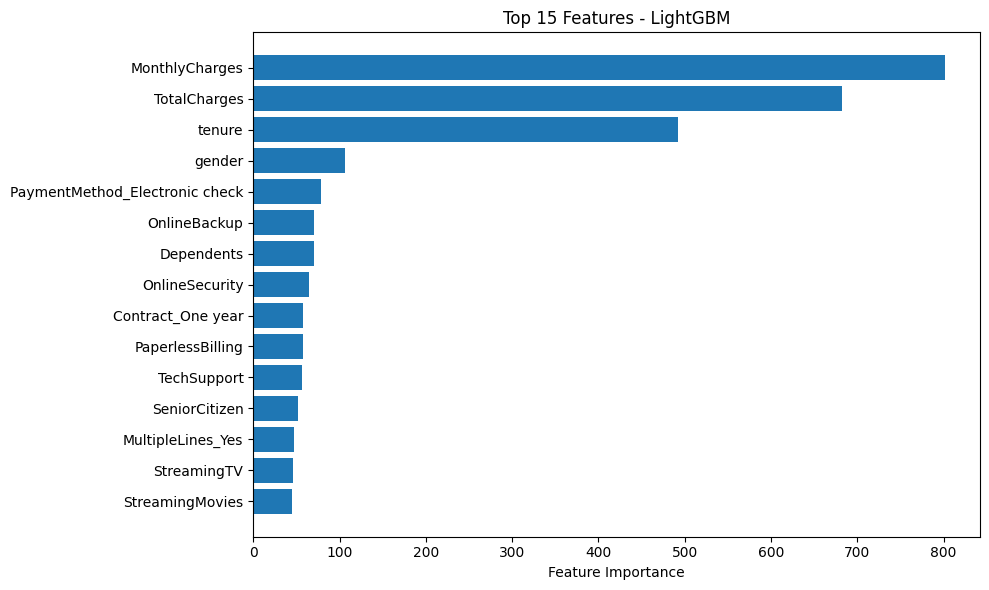

In [ ]:
# 1. Get feature names and importances
importances = lgb_clf.feature_importances_
feature_names = X_train.columns

# 2. Create a DataFrame
feature_imp_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# 3. Plot top 15 features
plt.figure(figsize=(10, 6))
plt.barh(feature_imp_df['feature'][:15][::-1], feature_imp_df['importance'][:15][::-1])
plt.xlabel("Feature Importance")
plt.title("Top 15 Features - LightGBM")
plt.tight_layout()
plt.show()

In [ ]:
!pip install shap
import shap

In [ ]:
explainer = shap.TreeExplainer(lgb_clf)
shap_values = explainer.shap_values(X_test)

/usr/local/lib/python3.12/dist-packages/shap/explainers/_tree.py:586: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


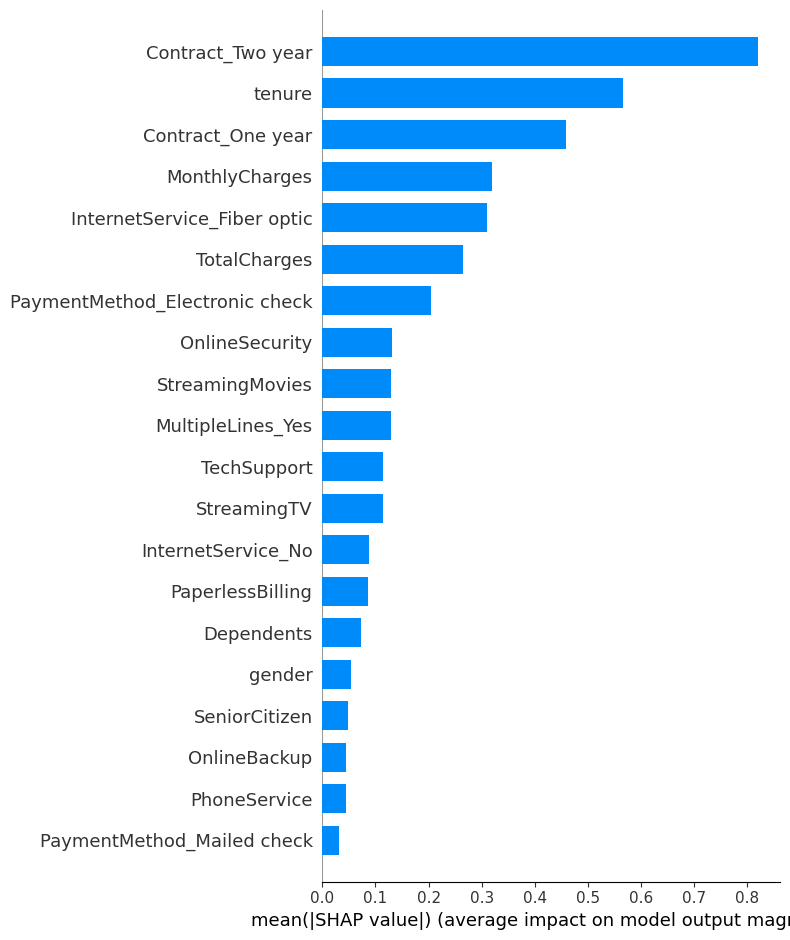

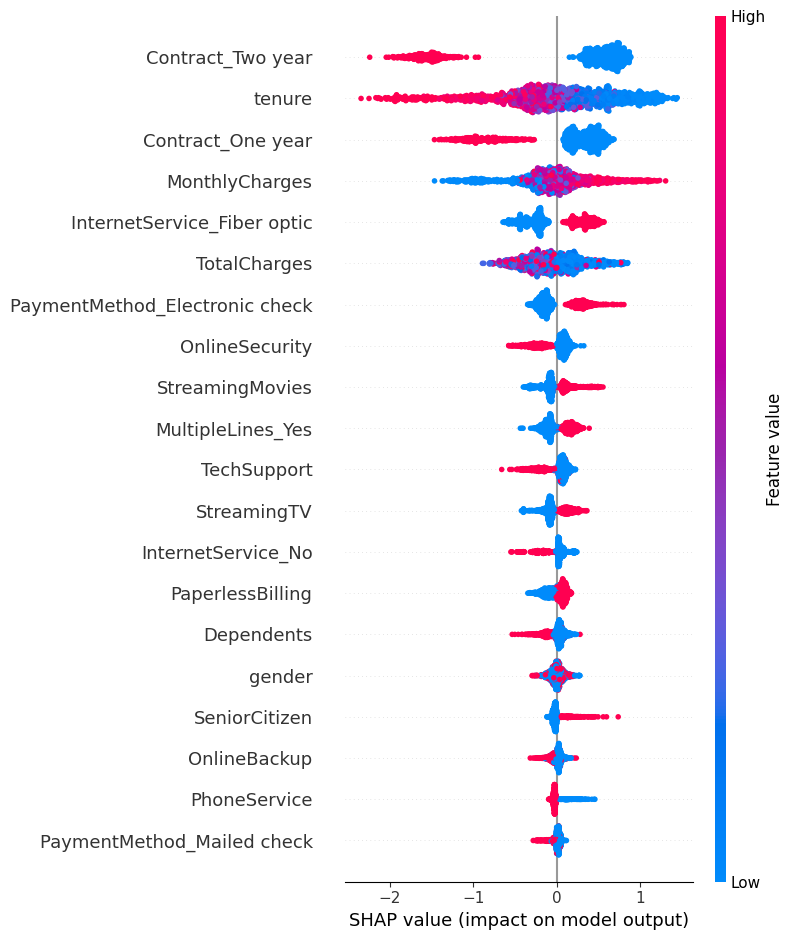

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.summary_plot(shap_values, X_test)  # beeswarm

In [ ]:
# Predict churn probability for entire dataset (X must be the full feature set)
df['Churn_Probability'] = lgb_clf.predict_proba(X)[:, 1]

In [ ]:
# Define risk labeling function
def risk_label(prob):
    if prob > 0.7:
        return "High Risk"
    elif prob > 0.4:
        return "Medium Risk"
    else:
        return "Low Risk"

# Apply to new column
df['Churn_Risk_Label'] = df['Churn_Probability'].apply(risk_label)

In [ ]:
# View counts per risk level
print(df['Churn_Risk_Label'].value_counts())

Churn_Risk_Label
Low Risk       3981
High Risk      1663
Medium Risk    1388
Name: count, dtype: int64


In [ ]:
high_risk = df[df['Churn_Risk_Label'] == 'High Risk']

In [ ]:
# Summary stats for high-risk customers
high_risk[['MonthlyCharges', 'TotalCharges', 'tenure']].describe()

,MonthlyCharges,TotalCharges,tenure
count,1663.000000,1663.000000,1663.000000
mean,77.065033,1089.653337,12.293446
std,21.490712,1497.860880,15.317278
min,19.400000,19.450000,1.000000
25%,69.850000,89.525000,1.500000
50%,80.450000,424.750000,5.000000
75%,94.050000,1426.575000,17.000000
max,118.350000,8127.600000,72.000000


In [ ]:
# How many high-risk customers are on month-to-month contracts?
print(high_risk['Contract_One year'].sum(), "→ One year")
print(high_risk['Contract_Two year'].sum(), "→ Two year")

# Internet service
print("Fiber optic:", high_risk['InternetService_Fiber optic'].sum())
print("No internet:", high_risk['InternetService_No'].sum())

# Payment method (optional)
for col in df.columns:
    if col.startswith('PaymentMethod'):
        print(f"{col}: {high_risk[col].sum()}")

35 → One year
4 → Two year
Fiber optic: 1303
No internet: 25
PaymentMethod_Credit card (automatic): 143
PaymentMethod_Electronic check: 1135
PaymentMethod_Mailed check: 241


In [ ]:
def assign_retention_action(row):
    if row['Contract_One year'] == 0 and row['Contract_Two year'] == 0 and row['tenure'] <= 6 and row['InternetService_Fiber optic'] == 1:
        return 'Offer contract discount'
    elif row['PaymentMethod_Electronic check'] == 1 and row['MonthlyCharges'] >= 90:
        return 'Promote auto-pay switch'
    elif row['tenure'] <= 3 and row['TotalCharges'] <= 200:
        return 'Send onboarding call/email'
    elif row['OnlineSecurity'] == 0 or row['TechSupport'] == 0:
        return 'Upsell support bundle'
    elif row['SeniorCitizen'] == 1 and row['MonthlyCharges'] >= 80:
        return 'Offer senior plan'
    else:
        return 'General retention message'

# Apply to high-risk customers
high_risk['Retention_Action'] = high_risk.apply(assign_retention_action, axis=1)

# Preview distribution of assigned actions
high_risk['Retention_Action'].value_counts()

/tmp/ipython-input-3193040019.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_risk['Retention_Action'] = high_risk.apply(assign_retention_action, axis=1)


,count
Retention_Action,
Offer contract discount,586
Upsell support bundle,522
Promote auto-pay switch,275
Send onboarding call/email,262
General retention message,11
Offer senior plan,7


In [ ]:
cols_to_export = [
    'tenure', 'MonthlyCharges', 'TotalCharges',
    'Contract_One year', 'Contract_Two year',
    'PaymentMethod_Electronic check',
    'OnlineSecurity', 'TechSupport', 'SeniorCitizen',
    'Retention_Action'
]

export_df = high_risk[cols_to_export].head(500)
export_path = '/content/drive/MyDrive/Projects/CustomerChurn/high_risk_retention_plan.csv'
export_df.to_csv(export_path, index=False)

In [ ]:
# Final columns to include in dashboard
dashboard_cols = [
    'tenure', 'MonthlyCharges', 'TotalCharges',
    'Contract_One year', 'Contract_Two year',
    'PaymentMethod_Electronic check',
    'OnlineSecurity', 'TechSupport', 'SeniorCitizen',
    'Churn_Risk_Label',
    'Retention_Action'
]

# Select top features and action column
dashboard_df = high_risk[dashboard_cols].copy()

# Export to CSV (adjust path if needed)
dashboard_path = '/content/drive/MyDrive/Projects/CustomerChurn/dashboard_data.csv'
dashboard_df.to_csv(dashboard_path, index=False)

print("✅ Dashboard data exported to:", dashboard_path)

✅ Dashboard data exported to: /content/drive/MyDrive/Projects/CustomerChurn/dashboard_data.csv


In [ ]:
from google.colab import files
files.download('/content/drive/MyDrive/Projects/CustomerChurn/dashboard_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>